In [2]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns
import pickle
import numpy as np

In [3]:
digits = load_digits()

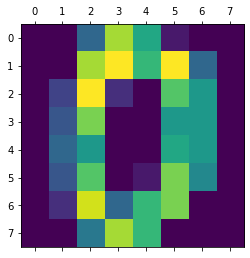

In [4]:
plt.matshow(digits.images[0]);

In [5]:
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [6]:
print(digits.target.shape)
print(digits.images.shape)
print(digits.data.shape)

(1797,)
(1797, 8, 8)
(1797, 64)


(array([178., 182., 177., 183., 181., 182., 181., 179., 174., 180.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

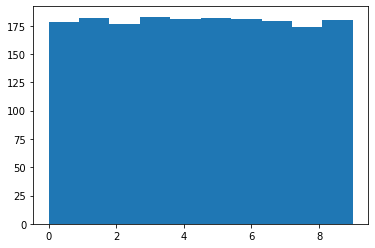

In [7]:
plt.hist(digits.target)

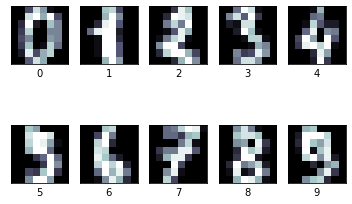

In [8]:
fig, ax = plt.subplots(2, 5)
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=digits.target_names[digits.target[i]])

In [9]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.images, digits.target, random_state=42)

In [10]:
from custlib.custom_transformer import custom_preproc

In [11]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

pre = custom_preproc()
pca = PCA(n_components=0.95)
svc = SVC(kernel='rbf', class_weight='balanced')

model = make_pipeline(pre,pca,svc)

model.fit(Xtrain,ytrain)
accu = cross_val_score(model,Xtrain, ytrain,scoring='accuracy',cv=5)
print(accu)
pca.n_components_

[0.98518519 0.98888889 0.98884758 0.98884758 0.98141264]


28

In [12]:
from sklearn.model_selection import GridSearchCV
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid)

%time grid.fit(Xtrain, ytrain)
print(grid.best_params_)

Wall time: 8.02 s
{'svc__C': 5, 'svc__gamma': 0.001}


In [13]:
model = grid.best_estimator_
yfit = model.predict(Xtest)

In [14]:
filename = 'model.pkl'
pickle.dump(model,open(filename,'wb'))

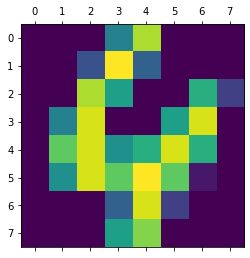

In [25]:
NX = Xtest[14].reshape(-1,8,8)
plt.matshow(NX.reshape(8,8));

In [26]:
JX = NX.tolist()

In [27]:
import json
json_string = json.dumps({'image':JX, 'author':'AJ', 'version':0.5})

In [28]:
json_string

'{"image": [[[0.0, 0.0, 0.0, 7.0, 14.0, 0.0, 0.0, 0.0], [0.0, 0.0, 4.0, 16.0, 5.0, 0.0, 0.0, 0.0], [0.0, 0.0, 14.0, 9.0, 0.0, 0.0, 10.0, 3.0], [0.0, 7.0, 15.0, 0.0, 0.0, 9.0, 15.0, 0.0], [0.0, 12.0, 15.0, 8.0, 10.0, 15.0, 10.0, 0.0], [0.0, 8.0, 15.0, 12.0, 16.0, 12.0, 1.0, 0.0], [0.0, 0.0, 0.0, 5.0, 15.0, 3.0, 0.0, 0.0], [0.0, 0.0, 0.0, 9.0, 13.0, 0.0, 0.0, 0.0]]], "author": "AJ", "version": 0.5}'

In [29]:
model.predict(NX)

array([4])